In [1]:
from localgraphclustering import *

import time
import numpy as np

# Load graph

In [2]:
# Read graph. This also supports gml format.
g = graph_class_local.GraphLocal('./datasets/JohnsHopkins.graphml','graphml')

# To get a quick look at the list of methods and attributes for the graph object 'g' you can type 'g.' + tab
# and scroll up or down.

/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:179: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


# Spectral global graph partitioning

In [3]:
# Create an object for global spectral partitioning
sp = spectral_partitioning.Spectral_partitioning()

# Call the global spectral partitioning algorithm.
output_sp = sp.produce([g])

# Create objects for spectral local graph partitioning methods

In [4]:
# Create an object for approximate PageRank algorithm.
pr = approximate_PageRank.Approximate_PageRank()
# Create an object for the C++ version of the approximate PageRank algorithm.
pr_fast = approximate_PageRank_fast.Approximate_PageRank_fast()
# Create an object for a weighted approximate PageRank algorithm.
pr_weighted_fast = approximate_PageRank_weighted_fast.Approximate_PageRank_weighted_fast()
# Create an object for a L1-regularized PageRank solver.
l1reg = l1_regularized_PageRank.L1_regularized_PageRank()
# Create an object for an accelerated L1-regularized PageRank solver.
l1reg_fast = l1_regularized_PageRank_fast.L1_regularized_PageRank_fast()
# Create an object for PageRank Nibble algorithm.
pr_nb = pageRank_nibble.PageRank_nibble()

# Example: produce embeddings using l1-regularized PageRank

In [5]:
# Find the solution of L1-regularized PageRank using localized accelerated gradient descent.
# This method is the fastest among other l1-regularized solvers and other approximate PageRank solvers.
output_l1reg_fast = l1reg_fast.produce([g],[3215])

# More examples

In [6]:
# Find an approximate PageRank vector.
output_pr = pr.produce([g],[0])
# Find an approximate PageRank vector by calling a C++ code.
output_pr_fast = pr_fast.produce([g],[0])
# Find an approximate PageRank vector.
output_pr_weighted_fast = pr_weighted_fast.produce([g],[0])
# Find the solution of L1-regularized PageRank.
output_l1reg = l1reg.produce([g],[0])
# Call the PageRank nibble algorithm.
output_pr_nb = pr_nb.produce([g],[0])

# Create objects for rounding methods

In [7]:
# Create an object for the sweep cut rounding procedure.
sc = sweepCut_general.SweepCut_general()
# Create an object for a C++ version of the sweep cut rounding procedure.
sc_fast = sweepCut_fast.SweepCut_fast()
# Create an object for the degree normalized sweep cut rounding procedure.
sc_normalized = sweepCut_normalized.SweepCut_normalized()

# Examples for rounding algorithms

In [8]:
# Call sweep cut rounding on the l1-regularized PageRank solution.
output_sc = sc.produce([g],p=output_l1reg_fast[0])
# Call C++ version of sweep cut rounding on the l1-regularized PageRank solution.
output_sc_fast = sc_fast.produce([g],p=output_l1reg_fast[0])
# Call degree normalized sweep cut rounding on the l1-regularized PageRank solution.
output_sc_normalized = sc_normalized.produce([g],p=output_l1reg_fast[0])

# Create objects for local spectral methods that incorporate rounding

In [9]:
# Create an object for the approximate PageRank algorithm + Rounding (this method uses a fast C++ implementation).
pr_clustering = approximate_PageRank_Clustering.Approximate_PageRank_Clustering()

# Create an object for the l1-regularized PageRank algorithm + Rounding (this method uses a fast C++ implementation).
l1reg_clustering = l1_regularized_PageRank_Clustering.L1_regularized_PageRank_Clustering()

# Examples for local spectral methods that incorporate rounding

In [10]:
# Find a cluster using approximate PageRank.
output_pr_clustering = pr_clustering.produce([g],[3215])

# Find a cluster using approximate PageRank.
output_l1reg_clustering = l1reg_clustering.produce([g],[3215])

# Example of flow-based local graph partitioning

In [11]:
g = graph_class_local.GraphLocal('./datasets/JohnsHopkins.graphml','graphml')

# Create an object for the C++ version of Capacity Releasing Diffusion
crd_fast = capacity_releasing_diffusion_fast.Capacity_Releasing_Diffusion_fast()

#Produce result
output_crd_fast = crd_fast.produce([g],[3215])
print("Conductance:",g.compute_conductance(output_crd_fast[0]))

/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:179: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


Conductance: 0.33089236859


# More flow-based local graph clustering methods

In [13]:
# How to use subgraph partitioning with MQI method.

g = graph_class_local.GraphLocal('./datasets/minnesota.edgelist','edgelist',' ')

# Create an object for subgraph node partitioning.
mqi_fast = MQI_fast.MQI_fast()

# The initial cut we want to improve
R = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]

# Conductance before improvement
print("Conductance before improvement:",g.compute_conductance(R))

# Start calling MQI
start = time.time()
output_MQI_fast = mqi_fast.produce([g],[R])
end = time.time()
print("running time:",str(end-start)+"s")

# Conductance after improvement
print("Conductance after improvement:",g.compute_conductance(output_MQI_fast[0][0]))

Exception: graph_class_local.read_graph: edges.shape[0] not in (2, 3)

In [14]:
# How to use subgraph partitioning with SimpleLocal method.

g = graph_class_local.GraphLocal('./datasets/minnesota.edgelist','edgelist',' ')

# Create an object for subgraph node partitioning.
SL_fast = SimpleLocal_fast.SimpleLocal_fast()

# The initial cut we want to improve
R = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,73,74,75,76,77,78,79,80,81,82,83,84,85,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,108,112,114,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,139,140,141,142,143,144,145,147,148,149,150,151,152,155,157,158,159,160,161,162,164,165,166,168,169,171,172,173,176,177,178,179,180,185,187,188,191,192,195,196,197,201,208,209,210,211,212,215,217,218,219,221,223,225,226,227,228,231,232,244,245,246,247,248,249,253,254,257,261,262,265,269,270,271,272,273,275,276,277,278,279,285,286,287,290,291,299,303,323,327]

# Conductance before improvement
print("Conductance before improvement:",g.compute_conductance(R))

# Start calling SimpleLocal
start = time.time()
output_SL_fast = SL_fast.produce([g],[R])
end = time.time()
print("running time:",str(end-start)+"s")

# Conductance after improvement
print("Conductance after improvement:",g.compute_conductance(output_SL_fast[0][0]))

Exception: graph_class_local.read_graph: edges.shape[0] not in (2, 3)

# Create an object for multiclass label prediction.

In [15]:
# Create an object for multiclass label prediction.
mc = multiclass_label_prediction.Multiclass_label_prediction()

# Example for multiclass label prediction

In [16]:
g = graph_class_local.GraphLocal('./datasets/JohnsHopkins.graphml','graphml')

# List of nodes around which we want to find labels
labels = [[1,10,300],[3215],[1002,2500,540]]

# This function predicts labels for unlabelled nodes. For details refer to:
# D. Gleich and M. Mahoney. Variational 
# Using Local Spectral Methods to Robustify Graph-Based Learning Algorithms. SIGKDD 2015.
# https://www.stat.berkeley.edu/~mmahoney/pubs/robustifying-kdd15.pdf
# To check to documentation for the input and output of this function call 
# help(multiclass_label_prediction)
output_mc = mc.produce([g],labels=labels)

/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:179: UserWarning: Loading a graphml is not efficient, we suggest using an edgelist format for this API.
  warnings.warn("Loading a graphml is not efficient, we suggest using an edgelist format for this API.")


# Densest subgraph 

In [17]:
#How to use densest subgraph method.
g = graph_class_local.GraphLocal('./datasets/Erdos02-cc.edgelist','edgelist',' ')

# Create an object for densest subgraph.
ds_fast = densest_subgraph_fast.densest_subgraph_fast()

# Produce result
output_ds_fast = ds_fast.produce([g])
print("Maximum density we found:",output_ds_fast[0][0])

Maximum density we found: 4.971153846153846


# Global partitioning for a subgraph

In [18]:
# Create an object for global spectral partitioning
sp_subgraph = spectral_partitioning_subgraph.Spectral_partitioning_subgraph()

# Call the global spectral partitioning algorithm for a subgraph.
output_sp_subgraph = sp_subgraph.produce([g],[output_ds_fast[0][1]])

# CRD Network Community Profile

In [20]:
G = graph_class_local.GraphLocal()
G.read_graph("./datasets/neuro-fmri-01.edges","edgelist", " ")
ncp_instance = ncp.Ncp()
df = ncp_instance.produce(G,method="crd",ratio=0.5,w=10,U=10,h=1000,do_largest_component=True)
ncp_plots = ncpplots.NCPPlots(df)
#plot conductance vs size
ncp_plots.cond_by_size()
#plot conductance vs volume
ncp_plots.cond_by_vol()
#plot isoperimetry vs size
ncp_plots.isop_by_size()

There are  738  connected components in the graph


/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:360: UserWarning: The graph has multiple (738) components, using the largest with 5725 / 6476 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))
Exception in thread Thread-12:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/localgraphclustering/ncp.py", line 68, in ncp_neighborhood_worker
    ncpdata.results.extend(ncp_experiment(ncpdata, R, func, method_stats))
  File "/usr/local/lib/python3.6/site-packages/localgraphclustering/ncp.py", line 25, in ncp_experiment
    S = func(ncpdata.graph, R)
  File "/usr/local/lib/python3.6/si

ValueError: scatter requires x column to be numeric

# MQI Network Community Profile

There are  738  connected components in the graph


/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:360: UserWarning: The graph has multiple (738) components, using the largest with 5725 / 6476 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))


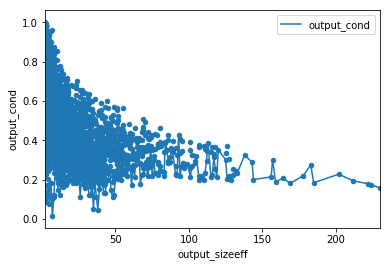

(<matplotlib.figure.Figure at 0x13ce8aac8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x14a1f2320>)

In [21]:
G = graph_class_local.GraphLocal()
G.read_graph("./datasets/neuro-fmri-01.edges","edgelist", " ")
ncp_instance = ncp.Ncp()
df = ncp_instance.produce(G,method="mqi",ratio=0.5,do_largest_component=True)
ncp_plots = ncpplots.NCPPlots(df)
#plot conductance vs size
ncp_plots.cond_by_size()
#plot conductance vs volume
ncp_plots.cond_by_vol()
#plot isoperimetry vs size
ncp_plots.isop_by_size()

# L1reg Network Community Profile

In [22]:
G = graph_class_local.GraphLocal()
G.read_graph("./datasets/neuro-fmri-01.edges","edgelist", " ")
ncp_instance = ncp.Ncp()
df = ncp_instance.produce(G,method="l1reg",ratio=0.5,do_largest_component=True)
ncp_plots = ncpplots.NCPPlots(df)
#plot conductance vs size
ncp_plots.cond_by_size()
#plot conductance vs volume
ncp_plots.cond_by_vol()
#plot isoperimetry vs size
ncp_plots.isop_by_size()

There are  738  connected components in the graph


/usr/local/lib/python3.6/site-packages/localgraphclustering/graph_class_local.py:360: UserWarning: The graph has multiple (738) components, using the largest with 5725 / 6476 nodes
  self.number_of_components, len(maxccnodes), self._num_vertices))
Exception in thread Thread-27:
Traceback (most recent call last):
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python3/3.6.3/Frameworks/Python.framework/Versions/3.6/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.6/site-packages/localgraphclustering/ncp.py", line 49, in ncp_node_worker
    ncpdata.results.extend(ncp_experiment(ncpdata, R, func, method_stats))
  File "/usr/local/lib/python3.6/site-packages/localgraphclustering/ncp.py", line 25, in ncp_experiment
    S = func(ncpdata.graph, R)
  File "/usr/local/lib/python3.6/site-packa

ValueError: scatter requires x column to be numeric